In [1]:
from core import *
import warnings
warnings.filterwarnings('ignore')

In [20]:
cell_path1 = './lr/after/datas/tree1.h5ad' #path for single-cell data1
folder_path1 = './lr/after/datas/tree1/'    #folder to save the results
radius1 = 0 # parameter for converting into meta cell

cell_path2 = './lr/after/datas/all_b/all_b.h5ad' #path for single-cell data2
folder_path2 = './lr/after/datas/all_b/'  
radius2 = 0

resolution=1 #parameter for clustering
method='average' # method we calcuclate the center value 
 
n_pca = 100 #pca number
meta_col= 'celltype' #celltype col in the single-cell file
epoches11 = 10 #number for embedding
epoches21 = 2 #number for rotation

# epoches12 = 15 #number for embedding
# epoches22 = 2 #number for rotation

c1=10 # threshold for merging
c2=10  # threshold for merging

In [3]:
merge_by_radius(cell_path1,folder_path1,radius1,method,meta_col)

100%|█████████████████████████████████████| 200/200 [00:00<00:00, 219310.01it/s]


In [4]:
adata1 = sc.read_h5ad(folder_path1+ 'adata.h5ad')


In [38]:
# adata1.obs['leiden']=adata1.obs['celltype']
# adata1.obs

In [39]:
adata1

AnnData object with n_obs × n_vars = 200 × 2000
    obs: 'celltype'

In [53]:
# adata1.obs['leiden']=adata1.obs['celltype']
# meta_list1 = ['0','1','2','3','4']

In [5]:
preprocessing_cluster(adata1,N_pcs=n_pca,resolution=resolution)


2024-07-30 17:34:08.875138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# preprocessing_cluster(adata1,N_pcs=n_pca,resolution=resolution)
inter_gene = sort_data(adata1,adata1)
tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1)
meta_list1 = calculate_cluster_celltype(adata1);


In [7]:
adata1.obs.groupby('leiden').describe()

celltype                
          count unique top freq
leiden                         
0            56      4   0   27
1            43      5   4   19
2            43      3   3   39
3            30      3   1   15
4            16      4   0    6
5            12      3   2    6

./lr/after/datas/tree1/datas.data length:6
Generating all pairs superset
	 Epoch 0 | average train loss: 0.929383
Optimization finished.
	 Epoch 1 | average train loss: 0.918746
Optimization finished.
	 Epoch 2 | average train loss: 0.919574
Optimization finished.
	 Epoch 3 | average train loss: 0.920116
Optimization finished.
	 Epoch 4 | average train loss: 0.914874
Optimization finished.
	 Epoch 5 | average train loss: 0.918022
Optimization finished.
	 Epoch 6 | average train loss: 0.917366
Optimization finished.
	 Epoch 7 | average train loss: 0.918784
Optimization finished.
	 Epoch 8 | average train loss: 0.915276
Optimization finished.
	 Epoch 9 | average train loss: 0.918994
Optimization finished.
	 Epoch 0 | average train loss1: 0.417325
	 Epoch 0 | average train loss2: 0.405875
	 Epoch 1 | average train loss1: 0.396467
	 Epoch 1 | average train loss2: 0.391597


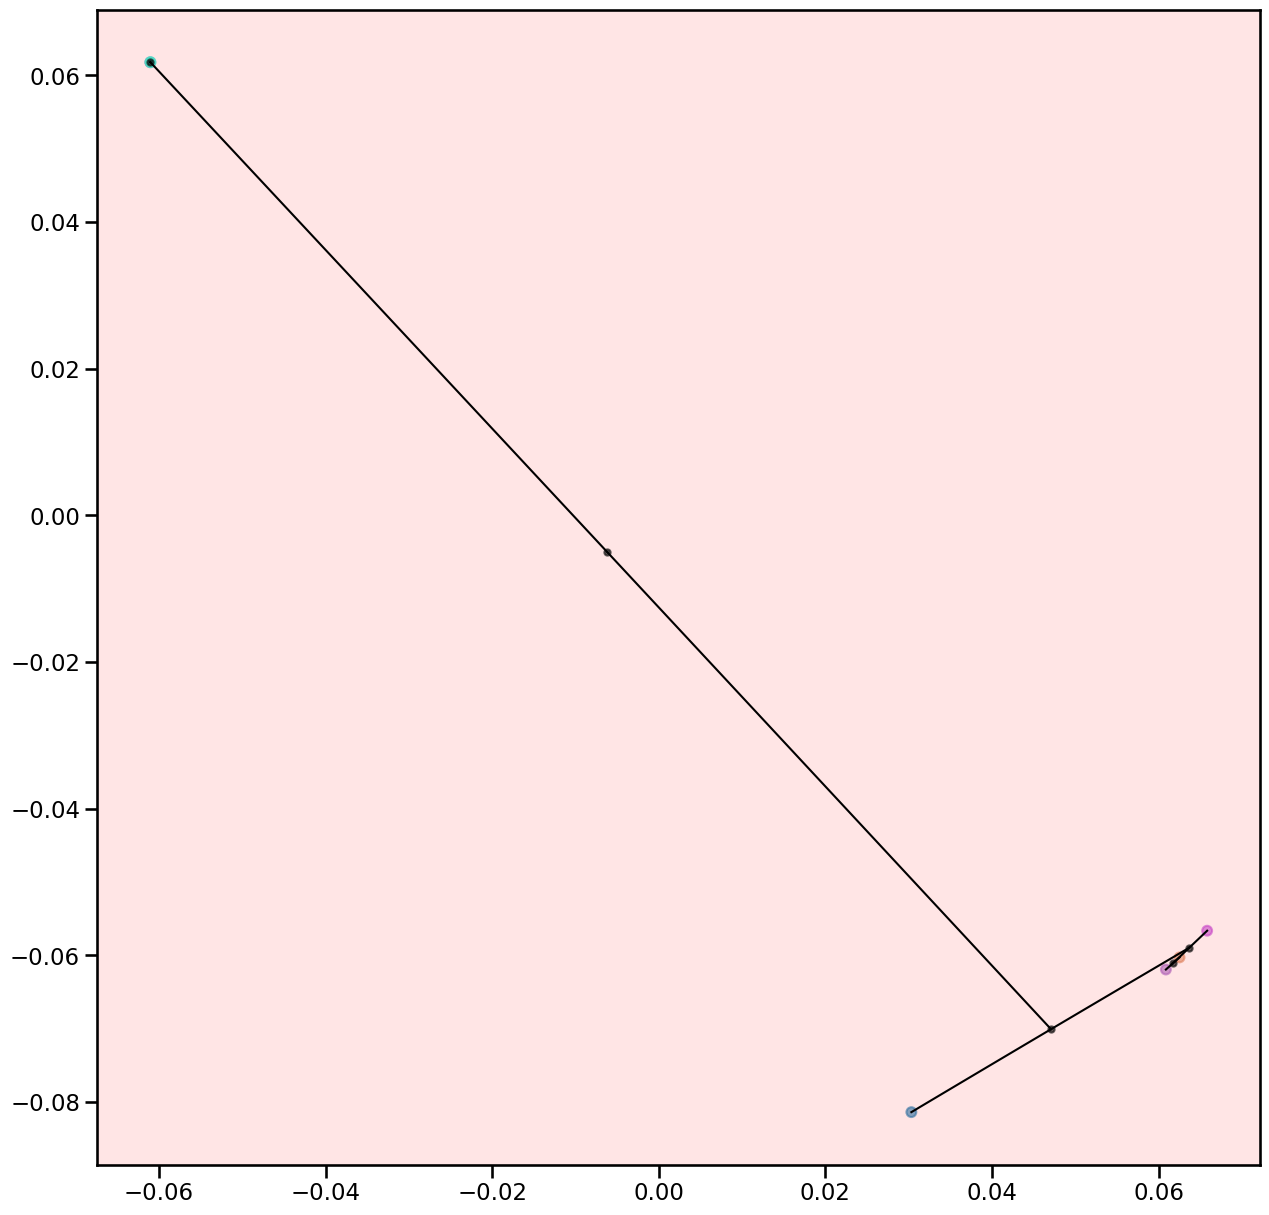

In [21]:
embeddings1,nodes1 = get_Hyper_tree(folder_path1 +'datas.data',1,tmp1.shape[1]+1,0,epoches11,epoches21,meta_list1,save_path=folder_path1)

In [22]:
merge_points_with_c(embeddings1,nodes1,folder_path1 +'datas.data',1,tmp1.shape[1]+1,0,folder_path1,epoches21,c1,c2)
nos1 = build_hyper_tree_from_folder(folder_path1,True)
add_meta(nos1[0],meta_list1,[])
show_tree(nos1[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(nos1[0]);

6 5
7 1
False
	 Epoch 0 | average train loss1: 0.411476
	 Epoch 0 | average train loss2: 0.386712
	 Epoch 1 | average train loss1: 0.409766
	 Epoch 1 | average train loss2: 0.387365
8 3
False
	 Epoch 0 | average train loss1: 0.401411
	 Epoch 0 | average train loss2: 0.381811
	 Epoch 1 | average train loss1: 0.399729
	 Epoch 1 | average train loss2: 0.382321
9 4
False
10 4
False
True
{'4': '#184e77', '0': '#1a759f', '3': '#168aad', '1': '#34a0a4', '2': '#52b69a', 'empty': '#fff'}


        0                       0
   1        2               1       2
  3 4                       4       0
                            3